In [7]:
from keras.datasets import mnist
from keras.utils import np_utils

In [10]:
(train_feature, train_label),(test_feature, test_label) = mnist.load_data()

## 資料預處理

In [11]:
# 將Feature轉換為784個浮數字的1維向量
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

In [12]:
# 將Feature以除以255得到0~1的浮點數來標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [13]:
# 進行One Hot Encoding
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

## 建立模型

In [14]:
from keras.models import Sequential

In [15]:
model = Sequential()

In [16]:
from keras.layers import Dense

In [17]:
# 加入輸入層以及隱藏層
# units = 256, 代表有256個隱藏層神經元數量； input_dim = 784, 代表有784個輸入層數量
# kernel_initializer = 'normal'初始化權重和偏差
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))

In [18]:
# 加入輸出層
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

## 訓練模型

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
train_history = model.fit(x = train_feature_normalize, y = train_label_onehot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4309 - accuracy: 0.8860 - val_loss: 0.2182 - val_accuracy: 0.9394
Epoch 2/10
 - 2s - loss: 0.1857 - accuracy: 0.9471 - val_loss: 0.1505 - val_accuracy: 0.9589
Epoch 3/10
 - 2s - loss: 0.1313 - accuracy: 0.9631 - val_loss: 0.1283 - val_accuracy: 0.9624
Epoch 4/10
 - 2s - loss: 0.1000 - accuracy: 0.9719 - val_loss: 0.1064 - val_accuracy: 0.9683
Epoch 5/10
 - 2s - loss: 0.0797 - accuracy: 0.9777 - val_loss: 0.1004 - val_accuracy: 0.9698
Epoch 6/10
 - 2s - loss: 0.0642 - accuracy: 0.9821 - val_loss: 0.0895 - val_accuracy: 0.9723
Epoch 7/10
 - 2s - loss: 0.0535 - accuracy: 0.9850 - val_loss: 0.0861 - val_accuracy: 0.9725
Epoch 8/10
 - 2s - loss: 0.0443 - accuracy: 0.9881 - val_loss: 0.0817 - val_accuracy: 0.9739
Epoch 9/10
 - 2s - loss: 0.0361 - accuracy: 0.9906 - val_loss: 0.0788 - val_accuracy: 0.9740
Epoch 10/10
 - 2s - loss: 0.0293 - accuracy: 0.9930 - val_loss: 0.0763 - val_accuracy: 0.9758


## 評估準確率

In [22]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("準確率 =", scores[1])

10000/10000 [==============================] - 0s 30us/step
準確率 = 0.9786999821662903


## 預測 && 顯示結果

In [33]:
prediction = model.predict_classes(test_feature_normalize)

In [34]:
def show_images_labels_predictions(images, labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
        
    plt.show()

In [35]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

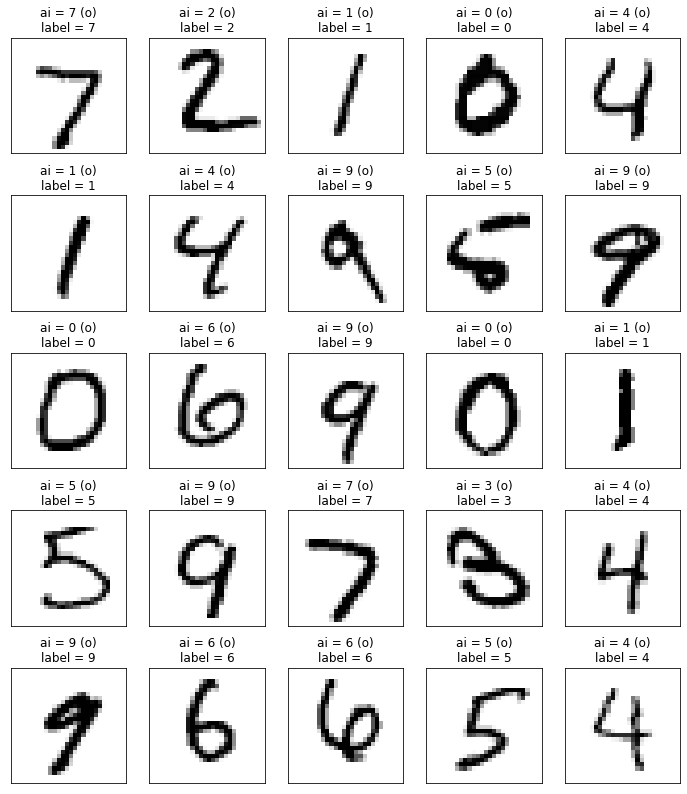

In [36]:
show_images_labels_predictions(test_feature,test_label,prediction,0,len(test_feature))